In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [27]:
# 두꺼운펜변환 함수 (사각펜)
def thick_pen_transform(X, taus, gamma=1):
    n = len(X)
    result = {}
    
    for tau in taus:
        U_tau = np.zeros(n)
        L_tau = np.zeros(n)
        
        for t in range(n - tau):
            U_tau[t] = np.max(X[t:t+tau+1]) + gamma * (tau / 2)
            L_tau[t] = np.min(X[t:t+tau+1]) - gamma * (tau / 2)
        
        # 경계 케이스 처리
        for t in range(n - tau, n):
            U_tau[t] = np.max(X[t:n]) + gamma * (tau / 2)
            L_tau[t] = np.min(X[t:n]) - gamma * (tau / 2)
        
        result[tau] = (L_tau, U_tau)
    
    return result

# 두꺼운펜 변환 상관계수 계산 함수
def rho_tau(X, Y, taus):
    rho_values = {}
    
    X_result = thick_pen_transform(X, taus)
    Y_result = thick_pen_transform(Y, taus)
    
    for tau in taus:
        rho_tau_t = np.zeros(len(X))
        
        L_tau_X, U_tau_X = X_result[tau]
        L_tau_Y, U_tau_Y = Y_result[tau]
        
        for t in range(len(X)):
            min_U = min(U_tau_X[t], U_tau_Y[t])
            max_L = max(L_tau_X[t], L_tau_Y[t])
            max_U = max(U_tau_X[t], U_tau_Y[t])
            min_L = min(L_tau_X[t], L_tau_Y[t])
            
            rho_tau_t[t] = (min_U - max_L) / (max_U - min_L)
        
        rho_values[tau] = rho_tau_t
    
    return rho_values

# 그냥 두꺼운펜

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


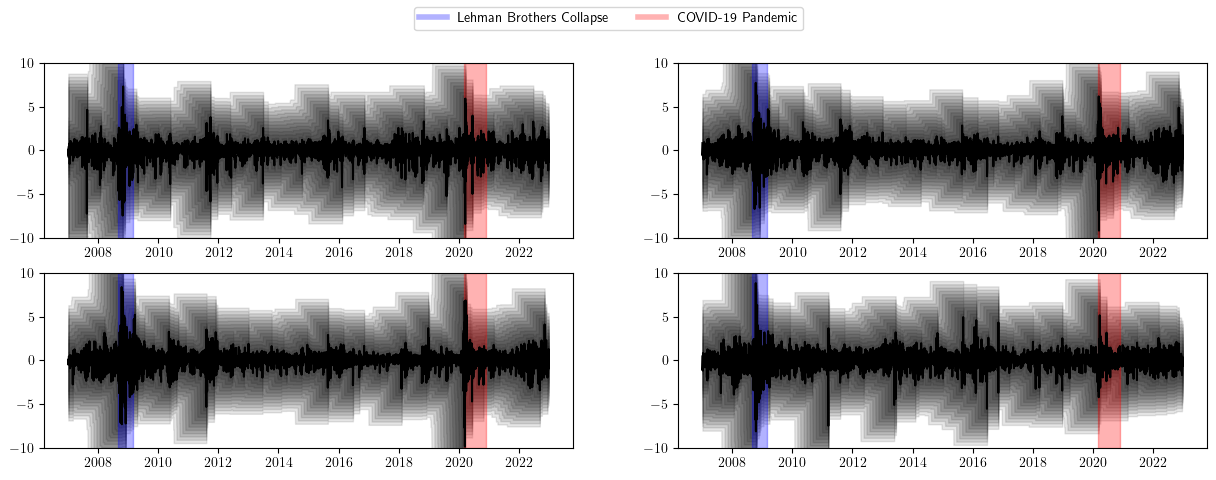

In [26]:
# 지수 데이터 수집
indices = {
    'KOSDAQ': '^KQ11',
    'NASDAQ': '^IXIC',
    'S&P 500': '^GSPC',
    'Nikkei 225': '^N225',
}

start_date = '2007-01-01'  # 리만 브라더스 사태를 포함한 시작 날짜
end_date = '2023-01-01'  # 종료 날짜
taus = list(range(25, 300, 25))  # 두께 매개변수

# 하이라이트 기간 정의
highlight_periods = [
    ('2008-09-01', '2009-03-01', 'Lehman Brothers Collapse', 'blue'),
    ('2020-03-01', '2020-12-01', 'COVID-19 Pandemic', 'red')
]

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # 필요한 패키지 설정

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

for i, (name, ticker) in enumerate(indices.items()):
    row = i // 2
    col = i % 2
    
    # 데이터 다운로드
    data = yf.download(ticker, start=start_date, end=end_date)
    close_prices = data['Close'].values
    dates = data.index

    # 로그 변환
    log_prices = np.log(close_prices)

    # 차분
    differenced_log_prices = np.diff(log_prices)

    # 표준화
    mean_diff = np.mean(differenced_log_prices)
    std_diff = np.std(differenced_log_prices)
    standardized_diff = (differenced_log_prices - mean_diff) / std_diff

    # 두꺼운펜변환 적용
    result = thick_pen_transform(standardized_diff, taus, gamma=0.03)

    # 시각화
    ax = axes[row, col]
    for tau, (L_tau, U_tau) in result.items():
        ax.fill_between(dates[1:], L_tau, U_tau, alpha=0.1, color='black')
    ax.plot(dates[1:], standardized_diff, color='black')
    for start, end, label, color in highlight_periods:
        ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=color, alpha=0.3)
    ax.set_ylim([-10, 10])        

# 각 플롯의 제목을 수동으로 설정
# titles = ['KOSDAQ (Thick-Pen Transform)', 'NASDAQ (Thick-Pen Transform)', 'S&P 500 (Thick-Pen Transform)', 'Nikkei 225 (Thick-Pen Transform)']
# axes[0,0].set_title(titles[0])
# axes[0,1].set_title(titles[1])
# axes[1,0].set_title(titles[2])
# axes[1,1].set_title(titles[3])

# 레전드 추가
handles = [plt.Line2D([0], [0], color='blue', alpha=0.3, lw=4),
           plt.Line2D([0], [0], color='red', alpha=0.3, lw=4)]
labels = [label for _, _, label, _ in highlight_periods]
fig.legend(handles, labels, loc='upper center', ncol=2)

#plt.tight_layout(rect=[0, 0, 1, 0.95])
#plt.show()

# 히트맵

In [29]:
# 지수 데이터 수집
indices = {
#    'KOSPI': '^KS11',
    'KOSDAQ': '^KQ11',
    'NASDAQ': '^IXIC',
    'S&P 500': '^GSPC',
#    'FTSE 100': '^FTSE',
#    'DAX': '^GDAXI',
    'Nikkei 225': '^N225',
 #   'Hang Seng': '^HSI'
}

start_date = '2007-01-01'  # 리만 브라더스 사태를 포함한 시작 날짜
end_date = '2023-01-01'  # 종료 날짜
taus = list(range(5, 300, 5))  # 두께 매개변수

# 데이터 다운로드 및 전처리
data_dict = {}
min_length = float('inf')

for name, ticker in indices.items():
    data = yf.download(ticker, start=start_date, end=end_date)
    close_prices = data['Close'].values
    dates = data.index

    # 로그 변환
    log_prices = np.log(close_prices)

    # 차분
    differenced_log_prices = np.diff(log_prices)

    # 표준화
    mean_diff = np.mean(differenced_log_prices)
    std_diff = np.std(differenced_log_prices)
    standardized_diff = (differenced_log_prices - mean_diff) / std_diff

    data_dict[name] = standardized_diff
    if len(standardized_diff) < min_length:
        min_length = len(standardized_diff)

# 데이터 길이를 최소 길이로 맞춤
for name in data_dict:
    data_dict[name] = data_dict[name][:min_length]

all_rho_values = []

# 데이터 딕셔너리에서 처음 7개의 항목만 선택
selected_indices = list(data_dict.keys())[:7]

for i, name1 in enumerate(selected_indices):
    for j, name2 in enumerate(selected_indices):
        if name1 != name2:  # 자기 자신과의 상관계수는 계산하지 않음
            rho_values = rho_tau(data_dict[name1], data_dict[name2], taus)
            
            rho_matrix = np.zeros((len(taus), min_length))

            for k, tau in enumerate(taus):
                rho_matrix[k, :] = rho_values[tau]
            
            all_rho_values.append(rho_matrix)
# 전체 데이터의 상위 x% 임계값 계산
all_rho_values = np.concatenate(all_rho_values)
global_threshold = np.percentile(all_rho_values, 90)

# Min-Max 스케일링
min_val = np.min(all_rho_values)
max_val = np.max(all_rho_values)

# 리먼 브라더스 사태와 코로나19 팬데믹 기간 정의
lehman_start = pd.Timestamp('2008-09-15')
lehman_end = pd.Timestamp('2009-03-31')
covid_start = pd.Timestamp('2020-03-11')
covid_end = pd.Timestamp('2021-12-31')

# 날짜 데이터 추출 (첫 번째 지수의 날짜를 사용)
dates = yf.download(indices[selected_indices[0]], start=start_date, end=end_date).index

# 이벤트 기간을 인덱스로 변환
lehman_start_idx = np.where(dates >= lehman_start)[0][0]
lehman_end_idx = np.where(dates <= lehman_end)[0][-1]
covid_start_idx = np.where(dates >= covid_start)[0][0]
covid_end_idx = np.where(dates <= covid_end)[0][-1]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 25))
for i, name1 in enumerate(selected_indices):
    for j, name2 in enumerate(selected_indices):
        ax = axes[i, j]
        
        if name1 == name2:  # 자기 자신과의 상관계수 위치에 'X' 표시
            ax.text(0.5, 0.5, 'X', fontsize=40, ha='center', va='center')
            ax.axis('off')
        else:
            rho_values = rho_tau(data_dict[name1], data_dict[name2], taus)
            rho_matrix = np.zeros((len(taus), min_length))

            for k, tau in enumerate(taus):
                rho_matrix[k, :] = rho_values[tau]

            # 전역 임계값을 사용하여 마스크 생성
            mask = rho_matrix < global_threshold

            # 마스크를 적용한 데이터 생성
            masked_data = np.ma.array(rho_matrix, mask=mask)

            # 커스텀 그레이스케일 컬러맵 생성 (하얀색 배경에 회색)
            colors = plt.cm.gray_r(np.linspace(0, 1, 256))
            colors[0] = [1, 1, 1, 1]  # 첫 번째 색상을 하얀색으로 설정
            custom_cmap = plt.cm.colors.LinearSegmentedColormap.from_list("custom_gray", colors)

            #im = ax.imshow(masked_data, aspect='auto', cmap=custom_cmap, extent=[0, min_length, min(taus), max(taus)], vmin=global_threshold, vmax=np.max(all_rho_values))
            im = ax.imshow(masked_data, aspect='auto', cmap=custom_cmap, extent=[0, min_length, min(taus), max(taus)], vmin=0, vmax=1)
            
            # 리먼 브라더스 사태 기간 표시
            ax.axvline(x=lehman_start_idx, color='b', linestyle='--', linewidth=0.5)
            ax.axvline(x=lehman_end_idx, color='b', linestyle='--', linewidth=0.5)
            
            # 코로나19 팬데믹 기간 표시
            ax.axvline(x=covid_start_idx, color='r', linestyle='--', linewidth=0.5)
            ax.axvline(x=covid_end_idx, color='r', linestyle='--', linewidth=0.5)
            
            ax.set_title(f'{name1} vs {name2}', fontsize=8)
            ax.set_xlabel('Time', fontsize=6)
            ax.set_ylabel('Tau', fontsize=6)
            ax.tick_params(axis='both', which='major', labelsize=6)

        if i == 6 and j == 6:  # 마지막 셀에만 컬러바 추가
            plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.2, aspect=30, shrink=0.8)
#plt.tight_layout()
#plt.show()

# 범례 추가
fig.legend(['Lehman Brothers', 'COVID-19'], loc='upper right', bbox_to_anchor=(0.99, 0.99), fontsize=8)

#plt.tight_layout()
#plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Error in callback <function _draw_all_if_interactive at 0x7b715e6937e0> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'KOSDAQ vs S&P 500'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpbxx_fhl_ 21578815a65761c19e54d863b146321b.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./21578815a65761c19e54d863b146321b.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 21578815a65761c19e54d863b146321b.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Misplaced alignment tab character &.
l.29 {\sffamily KOSDAQ vs S&
                            P 500}%
No pages of output.
Transcript written on tmpbxx_fhl_/21578815a65761c19e54d863b146321b.log.




RuntimeError: latex was not able to process the following string:
b'KOSDAQ vs S&P 500'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpexzh_h99 21578815a65761c19e54d863b146321b.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./21578815a65761c19e54d863b146321b.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 21578815a65761c19e54d863b146321b.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Misplaced alignment tab character &.
l.29 {\sffamily KOSDAQ vs S&
                            P 500}%
No pages of output.
Transcript written on tmpexzh_h99/21578815a65761c19e54d863b146321b.log.




<Figure size 2500x2500 with 16 Axes>